# Gradient Descent Code 분석
우선 그래프를 그려보기 위해 matplotlib와 numpy Interpreter를 불러온다

In [7]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np


3D 그림을 불러오기 위한 function을 만든다.

In [3]:
def plot_surface(x, y, z, azim=-60, elev=40, dist=10, cmap="RdYlBu_r"):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    plot_args = {'rstride': 1, 'cstride': 1, 'cmap': cmap, 'linewidth': 20, 'antialiased': True, 'vmin': -2, 'vmax': 2}
    ax.plot_surface(x, y, z, **plot_args)
    ax.view_init(azim=azim, elev=elev)
    ax.dist = dist
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_zlim(-2, 2)
    plt.xticks([-1, -0.5, 0, 0.5, 1],
               [r"$-1$", r"$-1/2$", r"$0$", r"$1/2$", r"$1$"])
    plt.yticks([-1, -0.5, 0, 0.5, 1],
               [r"$-1$", r"$-1/2$", r"$0$", r"$1/2$", r"$1$"])
    ax.set_zticks([-2, -1, 0, 1, 2])
    ax.set_zticklabels([r"$-2$", r"$-1$", r"$0$", r"$1$", r"$2$"])
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.set_xlabel(r"$x$", fontsize=18)
    ax.set_ylabel(r"$y$", fontsize=18)
    ax.set_zlabel(r"z", fontsize=18)
    return fig, ax;

x=np.mgrid[a:b:cj]는 a에서 b까지 c개의 linear를 생성한다.

예를 들면 x,y=np.mgrid[-1:1:3j, -1:1:3j]는 -1에서 1까지 3개의 linear 행렬을 생성한다.

그리고 x는 행, y는 열로 동일한 값을 가진다.

In [17]:
x1 = np.mgrid[-1:1:3j]
x2, y2 = np.mgrid[-1:1:3j, -1:1:3j]
print("x1=",x1)
print("x2=",x2)
print("y2=",y2)

x1= [-1.  0.  1.]
x2= [[-1. -1. -1.]
 [ 0.  0.  0.]
 [ 1.  1.  1.]]
y2= [[-1.  0.  1.]
 [-1.  0.  1.]
 [-1.  0.  1.]]


-1에서 1까지의 X와 Y의 grid를 생성한다.(31개)

In [4]:
x, y = np.mgrid[-1:1:31j, -1:1:31j]

## a quadratic minimum of the form
$$z=x^3-3xy^2$$

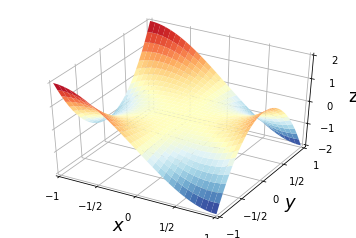

In [8]:
def monkey_saddle(x, y):
    return x ** 3 - 3 * x * y ** 2


fig1, ax1 = plot_surface(x, y, monkey_saddle(x, y))

## a saddle-point of the form
$$z=ax^2-by^2$$
$$z=x^2-y^2\text{, where } a=1, b=1$$

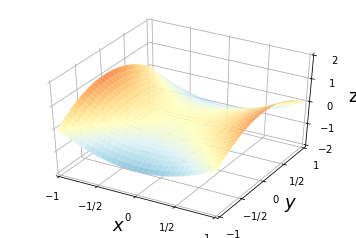

In [9]:
def saddle_surface(x, y, a=1, b=1):
    return a * x ** 2 - b * y ** 2


fig2, ax2 = plot_surface(x, y, saddle_surface(x, y))

$$z=ax^2-by^2-1$$
$$z=5x^2-y^2-1\text{, where } a=5, b=1$$

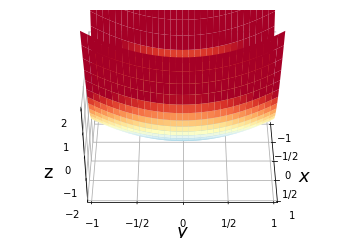

In [10]:
def minima_surface(x, y, a=1, b=1):
    return a * x ** 2 + b * y ** 2 - 1


fig3, ax3 = plot_surface(x, y, minima_surface(x, y, 5), 0)

## Beale's Function
$$z=(1.5 - x + xy)^2 + (2.25 - x + xy^2)^2 + (2.625 - x + xy^3)^2$$

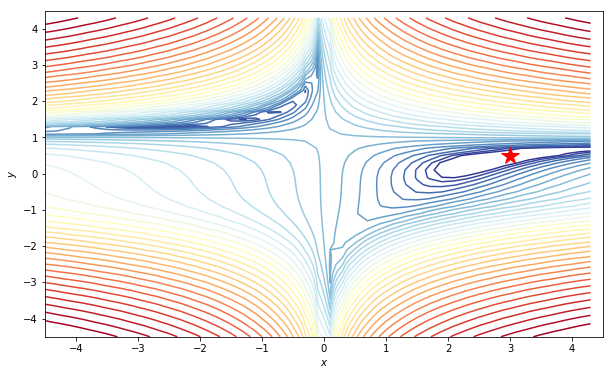

In [12]:
def contour_beales_function():
    x, y = np.meshgrid(np.arange(-4.5, 4.5, 0.2), np.arange(-4.5, 4.5, 0.2))
    fig, ax = plt.subplots(figsize=(10, 6))
    z = beales_function(x, y)
    ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")
    ax.plot(3, 0.5, 'r*', markersize=18)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_xlim((-4.5, 4.5))
    ax.set_ylim((-4.5, 4.5))
    return fig, ax


def beales_function(x, y):
    f = np.square(1.5 - x + x * y) + np.square(2.25 - x + x * y * y) + np.square(2.625 - x + x * y ** 3)
    return f


fig4, ax4 = contour_beales_function()
plt.show()